In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Для работы с датой
import datetime

## Загрузка данных

In [4]:
df = pd.read_csv('/Users/dminnakhmetova/InnoCourses/PMLDL/PMLDL-Assignment-1/data/raw/telegram_data.csv')
df.head(3)

,id,date,text,views,forwards,replies,reactions
0,21022,2025-09-18 06:24:59+00:00,Провокация в каждой ноте — встречайте новые ар...,30444,79,21,"{""ReactionEmoji(emoticon='❤')"": 226, 'Reaction..."
1,21021,2025-09-17 16:52:09+00:00,NaN,61303,315,0,{}
2,21020,2025-09-17 16:52:09+00:00,NaN,61067,315,0,{}


## Первичный обзор

In [5]:
print(f"Размер данных: {df.shape}")
df.info()
df.isnull().sum()

Размер данных: (3000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3000 non-null   int64 
 1   date       3000 non-null   object
 2   text       1257 non-null   object
 3   views      3000 non-null   int64 
 4   forwards   3000 non-null   int64 
 5   replies    3000 non-null   int64 
 6   reactions  3000 non-null   object
dtypes: int64(4), object(3)
memory usage: 164.2+ KB


id              0
date            0
text         1743
views           0
forwards        0
replies         0
reactions       0
dtype: int64

## Пропуски и особенности

Проверю:
* Сколько строк без текста?
* Есть ли странности в датах?
* Что внутри поля reactions?

In [6]:
print("Без текста:", df['text'].isnull().sum())
print(df['date'].head(3))
print(df['reactions'].head(3))

Без текста: 1743
0    2025-09-18 06:24:59+00:00
1    2025-09-17 16:52:09+00:00
2    2025-09-17 16:52:09+00:00
Name: date, dtype: object
0    {"ReactionEmoji(emoticon='❤')": 226, 'Reaction...
1                                                   {}
2                                                   {}
Name: reactions, dtype: object


## Обработка дат, распределение просмотров

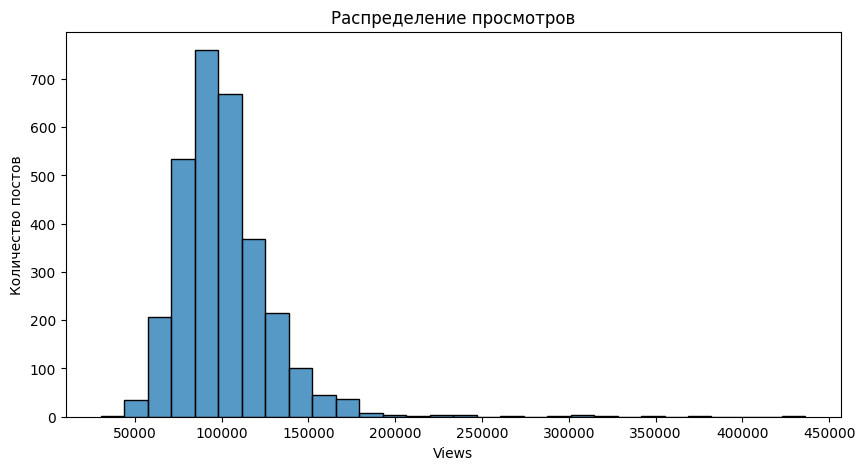

In [13]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(10,5))
sns.histplot(df['views'], bins=30)
plt.title('Распределение просмотров')
plt.xlabel('Views')
plt.ylabel('Количество постов')
plt.show()

## Cтруктура reactions


In [12]:
import ast

# Преобразуем первый не пустой reactions из str в dict
example = df.loc[df['reactions'].str.len() > 2, 'reactions'].iloc[0]
print(ast.literal_eval(example))

{"ReactionEmoji(emoticon='❤')": 226, 'ReactionCustomEmoji(document_id=5294214784856649592)': 145, "ReactionEmoji(emoticon='🔥')": 74, "ReactionEmoji(emoticon='😁')": 23, "ReactionEmoji(emoticon='👍')": 7, "ReactionEmoji(emoticon='⚡')": 2, "ReactionEmoji(emoticon='😍')": 2, "ReactionEmoji(emoticon='😇')": 2}
